In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os
import random
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.core import Dropout, Dense, Flatten, Activation
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from google.colab.patches import cv2_imshow
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
col_size = 224
row_size = 224

In [ ]:
data_dir = r'/content/drive/MyDrive/Data/train'
classes = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [ ]:
training_data = []
i = 0

def create_training_data():
   for category in classes: 
    path = os.path.join(data_dir, category)
    class_num = classes.index(category)

    for img in os.listdir(path):
      img_arr = cv.imread(os.path.join(path, img))
      new_img = cv.resize(img_arr, (col_size, row_size))
      training_data.append([new_img, class_num])

In [ ]:
create_training_data()

FileNotFoundError: ignored

In [ ]:
random.seed(123)
random.shuffle(training_data)

In [ ]:
X = []
Y = []

for matrixes, label in training_data:
  X.append(matrixes)
  Y.append(label)

In [ ]:
#del training_data

In [ ]:
X = np.array(X).reshape(-1,col_size, row_size, 3)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state=11)

In [ ]:
print(x_train[0])

[[[ 32  38  27]
  [ 33  39  28]
  [ 30  36  24]
  ...
  [155 183 151]
  [156 179 140]
  [109 130  87]]

 [[ 30  36  25]
  [ 28  34  23]
  [ 29  35  24]
  ...
  [132 157 123]
  [ 12  31   3]
  [  8  20   0]]

 [[ 25  30  21]
  [ 29  34  25]
  [ 22  27  18]
  ...
  [224 247 205]
  [223 238 208]
  [168 174 152]]

 ...

 [[  1   5  10]
  [  1   6   7]
  [  1   7   6]
  ...
  [  5   7   8]
  [  8  10  11]
  [  6   8   9]]

 [[  2   6   7]
  [  2   7   6]
  [  2   7   4]
  ...
  [  5   7   8]
  [  6   7   9]
  [  5   7   9]]

 [[  2   7   5]
  [  4   8   2]
  [  4   8   1]
  ...
  [  5   8   8]
  [  4   6   8]
  [  5   7   8]]]


In [ ]:
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)

In [ ]:
np.save('/content/drive/MyDrive/Data/assets/x_train.npy', x_train)
np.save('/content/drive/MyDrive/Data/assets/y_train.npy', y_train)
np.save('/content/drive/MyDrive/Data/assets/x_test.npy', x_test)
np.save('/content/drive/MyDrive/Data/assets/y_test.npy', y_test)

In [ ]:
del X,Y

### **base conv model**

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape = (224,224,3), ))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))

In [ ]:
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))

In [ ]:
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
res_CNN = model.fit(x_train, y_train, validation_split = 0.2, batch_size = 64, epochs = 10, verbose = 1)

Epoch 1/10
197/197 [==============================] - 117s 488ms/step - loss: 0.8616 - accuracy: 0.7302 - val_loss: 0.1675 - val_accuracy: 0.9520
Epoch 2/10
197/197 [==============================] - 92s 466ms/step - loss: 0.1170 - accuracy: 0.9649 - val_loss: 0.2565 - val_accuracy: 0.9097
Epoch 3/10
197/197 [==============================] - 93s 473ms/step - loss: 0.0659 - accuracy: 0.9805 - val_loss: 0.0716 - val_accuracy: 0.9870
Epoch 4/10
197/197 [==============================] - 93s 474ms/step - loss: 0.0534 - accuracy: 0.9833 - val_loss: 0.1170 - val_accuracy: 0.9644
Epoch 5/10
197/197 [==============================] - 94s 478ms/step - loss: 0.0393 - accuracy: 0.9881 - val_loss: 0.0388 - val_accuracy: 0.9876
Epoch 6/10
197/197 [==============================] - 94s 479ms/step - loss: 0.0390 - accuracy: 0.9880 - val_loss: 0.0489 - val_accuracy: 0.9885
Epoch 7/10
197/197 [==============================] - 94s 477ms/step - loss: 0.0665 - accuracy: 0.9783 - val_loss: 0.2238 - val_a

In [ ]:
pred_CNN = model.predict(x_test)

In [ ]:
np.save('/content/drive/MyDrive/Data/assets/pred_CNN.npy', pred_CNN)

In [ ]:
argmax_pred_CNN = pred_CNN.argmax(axis =1)

In [ ]:
cm = confusion_matrix(y_test.argmax(axis = 1), argmax_pred_CNN)

In [ ]:
#model.save('/content/drive/MyDrive/Data/cnn_distraction_detection.h5')

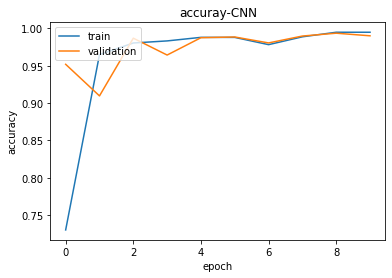

In [ ]:
plt.plot(res_CNN.history['accuracy'])
plt.plot(res_CNN.history['val_accuracy'])
scale_factor = 1
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.title('accuray-CNN')
plt.show()

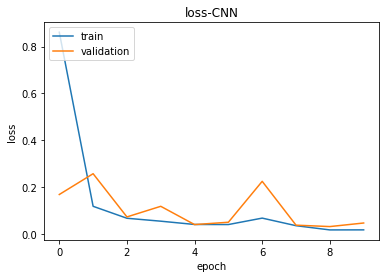

In [ ]:
plt.plot(res_CNN.history['loss'])
plt.plot(res_CNN.history['val_loss'])
scale_factor = 1
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('loss-CNN')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

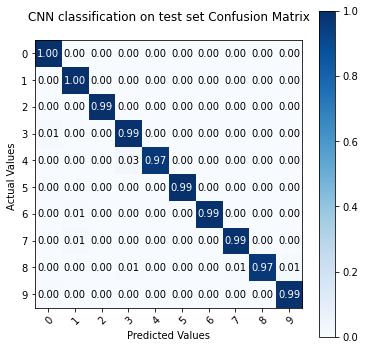

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

fig, ax = plot_confusion_matrix(conf_mat=cm, 
                                show_absolute=False,
                                show_normed=True,
                                colorbar= True,
                                figsize = (6,6),
                                class_names = class_names)
#ax = sns.heatmap(cm/np.sum(cm), cmap='Blues', annot=True, fmt='.0%')

ax.set_title('CNN classification on test set Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [ ]:
report = metrics.classification_report(y_test.argmax(axis = 1), argmax_pred_CNN)

In [ ]:
print('classification Reoprt for Resnet : \n', report)

classification Reoprt for Resnet : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       739
           1       0.98      1.00      0.99       664
           2       1.00      0.99      1.00       701
           3       0.97      0.99      0.98       728
           4       1.00      0.97      0.98       714
           5       1.00      0.99      1.00       712
           6       1.00      0.99      0.99       673
           7       0.99      0.99      0.99       603
           8       1.00      0.97      0.98       584
           9       0.99      0.99      0.99       620

    accuracy                           0.99      6738
   macro avg       0.99      0.99      0.99      6738
weighted avg       0.99      0.99      0.99      6738



In [ ]:
del model

# **#train with vgg19 model**

In [ ]:
vgg19 = keras.applications.vgg19.VGG19(include_top=False, input_shape=(224, 224, 3) )

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg19_model = Sequential()

In [ ]:
vgg19_model.add(vgg19)
vgg19_model.add(Flatten())
vgg19_model.add(Dense(10, activation='softmax'))
vgg19_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                250890    
                                                                 
Total params: 20,275,274
Trainable params: 20,275,274
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for layer in vgg19_model.layers[:-3]:
  layer.trainable = False

In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg19_model.compile(Adam(learning_rate=0.0001), loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
res_VGG = vgg19_model.fit(x_train, y_train,batch_size = 64, validation_split = 0.2, epochs=10, verbose=2)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-376f3b5b024a>", line 1, in <module>
    res_VGG = vgg19_model.fit(x_train, y_train,batch_size = 64, validation_split = 0.2, epochs=10, verbose=2)
NameError: name 'x_train' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context

NameError: ignored

In [ ]:
tf.keras.utils.plot_model(vgg19_model,to_file='vgg.png', show_shapes=True)

In [ ]:
tf.keras.utils.plot_model(vgg19,to_file='vgg1.png', show_shapes=True)

In [ ]:
pred_VGG = vgg19_model.predict(x_test)

In [ ]:
np.save('/content/drive/MyDrive/Data/assets/pred_VGG.npy', pred_VGG)

In [ ]:
argmax_pred_VGG = pred_VGG.argmax(axis = 1)

In [ ]:
cm_vgg = confusion_matrix(y_test.argmax(axis = 1), argmax_pred_VGG)

In [ ]:
cr = metrics.classification_report(y_test.argmax(axis = 1), argmax_pred_VGG)
print('classification Reoprt for VGG19 : \n', cr)

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=cm_vgg, 
                                show_absolute=False,
                                show_normed=True,
                                colorbar = True,
                                figsize = (6,6),
                                class_names = class_names)

ax.set_title('VGG classification on test set Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [ ]:
plt.plot(res_VGG.history['accuracy'])
plt.plot(res_VGG.history['val_accuracy'])

scale_factor = 1
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.title('accuray-VGG19')
plt.show()

In [ ]:
plt.plot(res_VGG.history['loss'])
plt.plot(res_VGG.history['val_loss'])

scale_factor = 1
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('loss-VGG19')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#np.save('/content/drive/MyDrive/Data/assets/pred_vgg.npy', pred_VGG)

In [ ]:
del vgg19, vgg19_model

In [ ]:
del res_VGG

#ResNet Model

In [ ]:
resnet = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False, 
                                             input_shape = (224,224,3))


94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet.summary()

In [ ]:
Resnet_model = Sequential()

In [ ]:
Resnet_model.add(resnet)
Resnet_model.add(Flatten())
Resnet_model.add(Dense(10, activation = 'softmax'))

In [ ]:
for layer in Resnet_model.layers[:-3]:
  layer.trainable = False

In [ ]:
Resnet_model.compile(Adam(learning_rate=0.0001), loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
res_Resnet = Resnet_model.fit(x_train, y_train,batch_size = 64, validation_split = 0.2, epochs=10, verbose=2)

Epoch 1/10
197/197 - 154s - loss: 0.2475 - accuracy: 0.9416 - val_loss: 0.0790 - val_accuracy: 0.9819 - 154s/epoch - 782ms/step
Epoch 2/10
197/197 - 137s - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0190 - val_accuracy: 0.9943 - 137s/epoch - 695ms/step
Epoch 3/10
197/197 - 137s - loss: 0.0093 - accuracy: 0.9978 - val_loss: 0.0764 - val_accuracy: 0.9790 - 137s/epoch - 696ms/step
Epoch 4/10
197/197 - 137s - loss: 0.0560 - accuracy: 0.9882 - val_loss: 0.6525 - val_accuracy: 0.9443 - 137s/epoch - 695ms/step
Epoch 5/10
197/197 - 136s - loss: 0.0322 - accuracy: 0.9924 - val_loss: 0.0371 - val_accuracy: 0.9936 - 136s/epoch - 693ms/step
Epoch 6/10
197/197 - 137s - loss: 0.0074 - accuracy: 0.9983 - val_loss: 0.0272 - val_accuracy: 0.9962 - 137s/epoch - 697ms/step
Epoch 7/10
197/197 - 137s - loss: 9.4494e-04 - accuracy: 0.9998 - val_loss: 0.0190 - val_accuracy: 0.9978 - 137s/epoch - 695ms/step
Epoch 8/10
197/197 - 137s - loss: 2.9751e-05 - accuracy: 1.0000 - val_loss: 0.0187 - val_accuracy: 0

In [ ]:
pred_Resnet = Resnet_model.predict(x_test)

In [ ]:
np.save('/content/drive/MyDrive/Data/assets/pred_Resnet.npy', pred_Resnet)

In [ ]:
argmax_pred_Resnet = pred_Resnet.argmax(axis = 1)

In [ ]:
cm_Resnet = confusion_matrix(y_test.argmax(axis = 1), argmax_pred_Resnet)

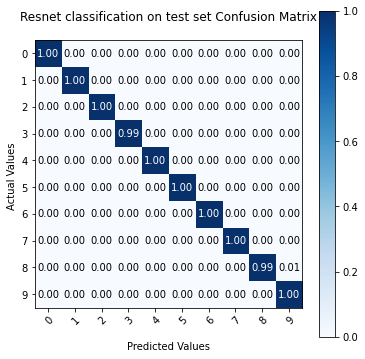

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=cm_Resnet, 
                                show_absolute=False,
                                show_normed=True,
                                colorbar = True, 
                                figsize = (6,6),
                                class_names = class_names)

ax.set_title('Resnet classification on test set Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

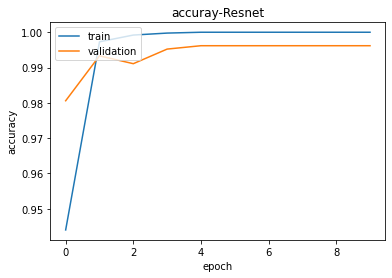

In [ ]:
plt.plot(res_Resnet.history['accuracy'])
plt.plot(res_Resnet.history['val_accuracy'])
scale_factor = 1
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.title('accuray-Resnet')
plt.show()

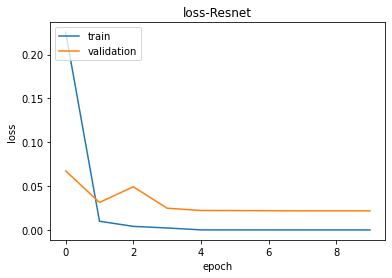

In [ ]:
plt.plot(res_Resnet.history['loss'])
plt.plot(res_Resnet.history['val_loss'])
scale_factor = 1
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('loss-Resnet')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
cr_Resnet = metrics.classification_report(y_test.argmax(axis = 1), argmax_pred_Resnet)
print('classification Reoprt for Resnet : \n', cr_Resnet)

classification Reoprt for Resnet : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       739
           1       1.00      1.00      1.00       664
           2       1.00      1.00      1.00       701
           3       1.00      0.99      1.00       728
           4       1.00      1.00      1.00       714
           5       1.00      1.00      1.00       712
           6       1.00      1.00      1.00       673
           7       1.00      1.00      1.00       603
           8       1.00      0.99      0.99       584
           9       0.99      1.00      0.99       620

    accuracy                           1.00      6738
   macro avg       1.00      1.00      1.00      6738
weighted avg       1.00      1.00      1.00      6738



In [ ]:
#tf.keras.utils.plot_model(resnet,to_file='resnet.png', show_shapes=True)

In [ ]:
#Resnet_model.save('/content/drive/MyDrive/Models/Resnet.h5')

#Ensembling

In [ ]:
pred_CNN = np.load('/content/drive/MyDrive/Data/assets/pred_CNN.npy')
pred_Resnet = np.load('/content/drive/MyDrive/Data/assets/pred_Resnet.npy')
pred_VGG = np.load('/content/drive/MyDrive/Data/assets/pred_VGG.npy')
y_test = np.load('/content/drive/MyDrive/Data/assets/y_test.npy')
x_test = np.load('/content/drive/MyDrive/Data/assets/x_test.npy')
x_train = np.load('/content/drive/MyDrive/Data/assets/x_train.npy')
y_train = np.load('/content/drive/MyDrive/Data/assets/y_train.npy')




In [ ]:
def voting_classifier(y, y1, y2):
    pred = []
    for i in range(len(y)):
        lst = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        tmp = y[i]
        lst[tmp] += 1
        tmp = y1[i]
        lst[tmp] += 1
        tmp = y2[i]
        lst[tmp] += 1
        max_value = max(lst)
        tmp1 = lst.index(max_value)
        pred.append(tmp1)
    return pred

In [ ]:
new_predict = voting_classifier(pred_CNN.argmax(axis = 1), pred_Resnet.argmax(axis = 1), pred_VGG.argmax(axis = 1))

In [ ]:
#new_predict

In [ ]:
cm_ens = confusion_matrix(y_test.argmax(axis = 1), new_predict)

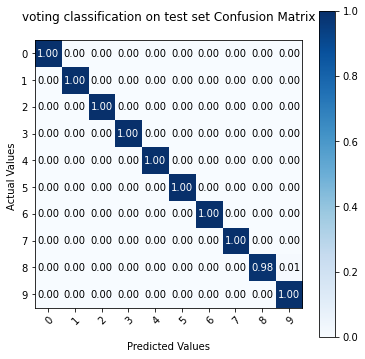

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=cm_ens, 
                                show_absolute=False,
                                show_normed=True,
                                colorbar = True, 
                                figsize = (6,6),
                                class_names = class_names)

ax.set_title('voting classification on test set Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [ ]:
cr_voting = metrics.classification_report(y_test.argmax(axis = 1), new_predict)
print('classification Reoprt for voting classifier :\n', cr_voting)

classification Reoprt for voting classifier :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       739
           1       1.00      1.00      1.00       664
           2       1.00      1.00      1.00       701
           3       1.00      1.00      1.00       728
           4       1.00      1.00      1.00       714
           5       1.00      1.00      1.00       712
           6       1.00      1.00      1.00       673
           7       1.00      1.00      1.00       603
           8       1.00      0.98      0.99       584
           9       0.99      1.00      0.99       620

    accuracy                           1.00      6738
   macro avg       1.00      1.00      1.00      6738
weighted avg       1.00      1.00      1.00      6738



#load test

In [ ]:
PATH = r'/content/drive/MyDrive/Data/sub_test'
test_list = ['img_10.jpg', 'img_11.jpg', 'img_15.jpg', 'img_13.jpg']

In [ ]:
img_list = []
for i in test_list:
  path = os.path.join(PATH, i)
  img = cv.imread(path)
  new_img = cv.resize(img, (col_size, row_size))
  img_list.append(new_img)


In [ ]:
X = np.array(img_list).reshape(-1,col_size, row_size, 3)

In [ ]:
p = Resnet_model.predict(X)

In [ ]:
p.argmax(axis = 1)

array([5, 1, 4, 2])

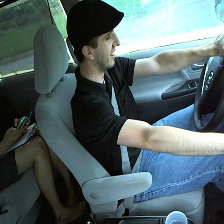

Actual class : Operating the radio.
Model Predicted : Operating the radio



In [ ]:
cv2_imshow(img_list[0])
print('Actual class : Operating the radio.')
print('Model Predicted : Operating the radio\n')

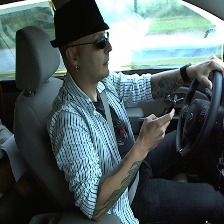

Actual class : Texting on right hand.
Model Predicted : Texting on right hand.



In [ ]:
cv2_imshow(img_list[1])
print('Actual class : Texting on right hand.')
print('Model Predicted : Texting on right hand.\n')

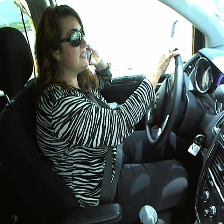

Actual class : Cell-phone talking on left-hand.
Model Predicted : Operating the radio.


In [ ]:
cv2_imshow(img_list[2])
print('Actual class : Cell-phone talking on left-hand.')
print('Model Predicted : Operating the radio.')

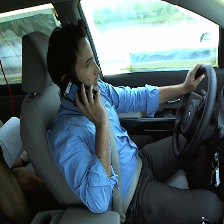

Actual class : Cell-phone talking on right-hand.
Model Predicted : Cell-phone talking on right-hand.



In [ ]:
cv2_imshow(img_list[3])
print('Actual class : Cell-phone talking on right-hand.')
print('Model Predicted : Cell-phone talking on right-hand.\n')

#visual model

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 29.4 MB/s 


In [ ]:
import visualkeras
from PIL import ImageFont

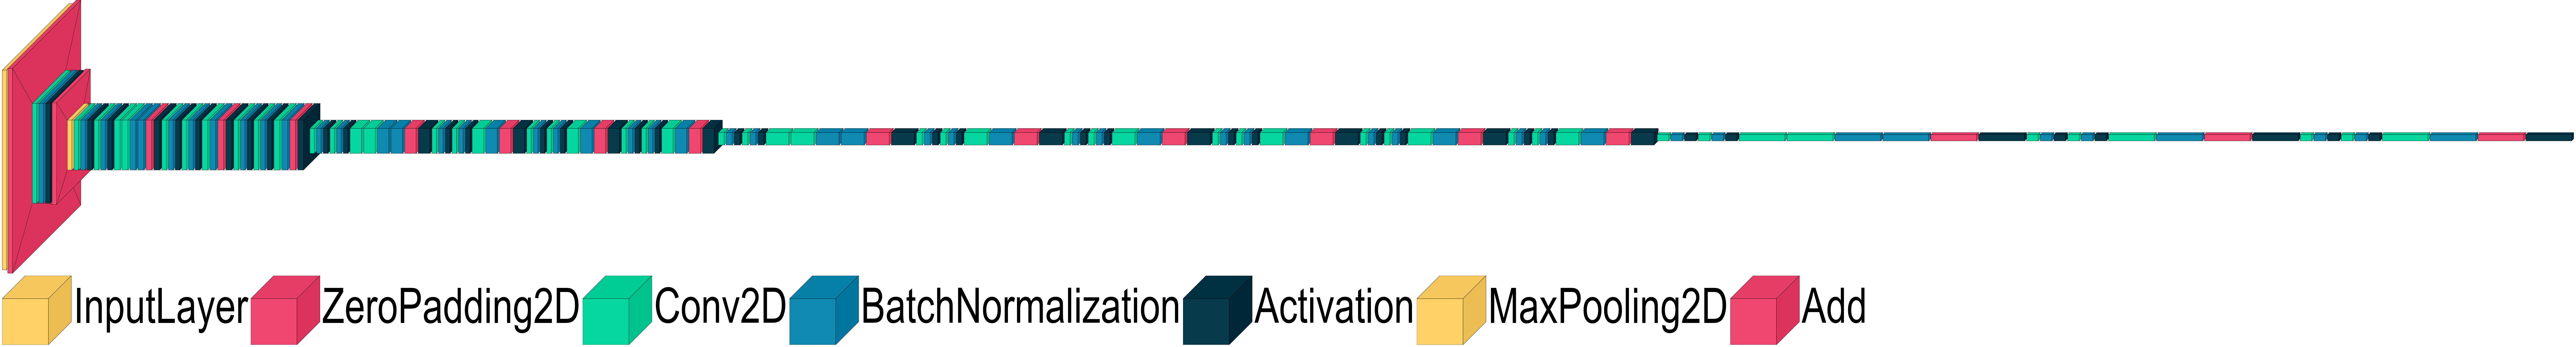

In [ ]:
font = ImageFont.truetype('/content/drive/MyDrive/Fonts/ArialTh.ttf',220)
visualkeras.layered_view(resnet, legend = True, font = font)

In [ ]:
model1 = Sequential()

vgg19.add(Flatten())
vgg19.add(Dense(10))


AttributeError: ignored